In [ ]:
import csv
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

In [37]:
class DataAnalysis():
    def __init__(self, datapath = None, Year = None, Month = None, Day = None, Hour = None):
        self.datapath = datapath
        self.Year = Year
        self.Month = Month
        self.Day = Day
        self.Hour = Hour
        self.histogram_filename = self.datapath + '/' + str(Year) + str(Month) + str(Day) + '/' + 'Histogram' + '/' + str(Year) + str(Month) + str(Day) + str(Hour) + "_Counter_Histogram_Data.csv"
        self.line_filename = self.datapath + '/' + str(Year) + str(Month) + str(Day) + '/' + 'Line Chart' + '/' + str(Year) + str(Month) + str(Day) + str(Hour) + "_Counter_mean_Data.csv"

    def hist_sort(self, bin): # Binning Counts in different Bins into a single file
        bin_path = self.datapath + '/'  + str(self.Year) + str(self.Month) + str(self.Day) + '/' + 'Binned_Data'
        _filename = bin_path + '/' + str(self.Year) + str(self.Month) + str(self.Day) + str(self.Hour) + "_Bin_" + str(bin) + "_Data.csv"
        if os.path.exists(bin_path) is False:
                os.makedirs(bin_path)
        
        col_names = ['Date and Time', 'Bin_ID', 'Counts']
        df = pd.read_csv(self.histogram_filename, names = col_names, header=None)
        df = df.loc[df['Bin_ID'] == bin]
        
        df = df[['Date and Time', 'Counts']]
        df.to_csv(_filename, index=False)
    
    def line_check(self, win = 100):
        self.win = win
        col_names = ['Date and Time', 'Time Mark', 'Mean', 'Counts', 'Note']
        df = pd.read_csv(self.line_filename, names = col_names, header=None, encoding = 'gbk')
        #line_path = self.datapath + '/'  + str(self.Year) + str(self.Month) + str(self.Day) + '/' + 'Line_Analysis'
        #_filename = line_path + '/' + str(self.Year) + str(self.Month) + str(self.Day) + str(self.Hour) + "_Line_Analysis.csv"
        f = df.dropna(how ='any', axis = 0)
        df = df[['Date and Time', 'Mean', 'Counts', 'Note']]

        ind = list(f.index.values.tolist())
        self.dic = []
        self.flag = None
        
        if ind == []:
            self.flag = False
            self.dic = df.iloc[0:self.win,:]
        else:
            self.flag = True
            for i in ind:
                if i + win< len(df):
                    self.dic.append(df.iloc[i:i + win, :])
                else:
                    self.dic.append(df.iloc[i:, :])
    
    def line_check_plt(self):
        if self.flag is False:
            fig, ax = plt.subplots(1, 1, figsize=(14, 7))
            ax.set_title('First {} data points'.format(self.win))
            ax.set_xlabel("Date and Time")
            ax.set_ylabel("Mean")
            ax.plot(list(range(1, self.win + 1)), self.dic.iloc[:,1])
        else:
            l = len(self.dic)
            num_wid = 2
            num_len = np.ceil(l / num_wid)
            wid = num_wid * 14
            flen = num_len * 7
            fig, ax = plt.subplots(int(num_len), int(num_wid), figsize=(wid, flen))


            print("改变参数后{}".format(self.win)  + "秒后均值变化")
            for i in range(int(num_len)):
                for j in range(int(num_wid)):
                    if 2 * i + j < l:
                        ax[i][j].set_title(self.dic[2 * i + j].iloc[0,3])
                        #ax[i][j].xaxis.set_visible(False)
                        ax[i][j].set_xlabel("Date and Time")
                        ax[i][j].set_ylabel("Mean")
                        ax[i][j].plot(list(range(1, self.win + 1)), self.dic[2 * i + j].iloc[:,1])
    
    def hist_plt(self, num_bin = 32):
        self.hist = []
        for bin in range(num_bin):
            bin_path = self.datapath + '/'  + str(self.Year) + str(self.Month) + str(self.Day) + '/' + 'Binned_Data'
            _filename = bin_path + '/' + str(self.Year) + str(self.Month) + str(self.Day) + str(self.Hour) + "_Bin_" + str(bin) + "_Data.csv"

            col_names = ['Date and Time', 'Counts']
            try:
                df = pd.read_csv(self.histogram_filename, names = col_names, header=None)
            except:
                raise ValueError('The file or directory does not exist')

            self.hist.append(df)    
        
        

        
        

改变参数后100秒后均值变化


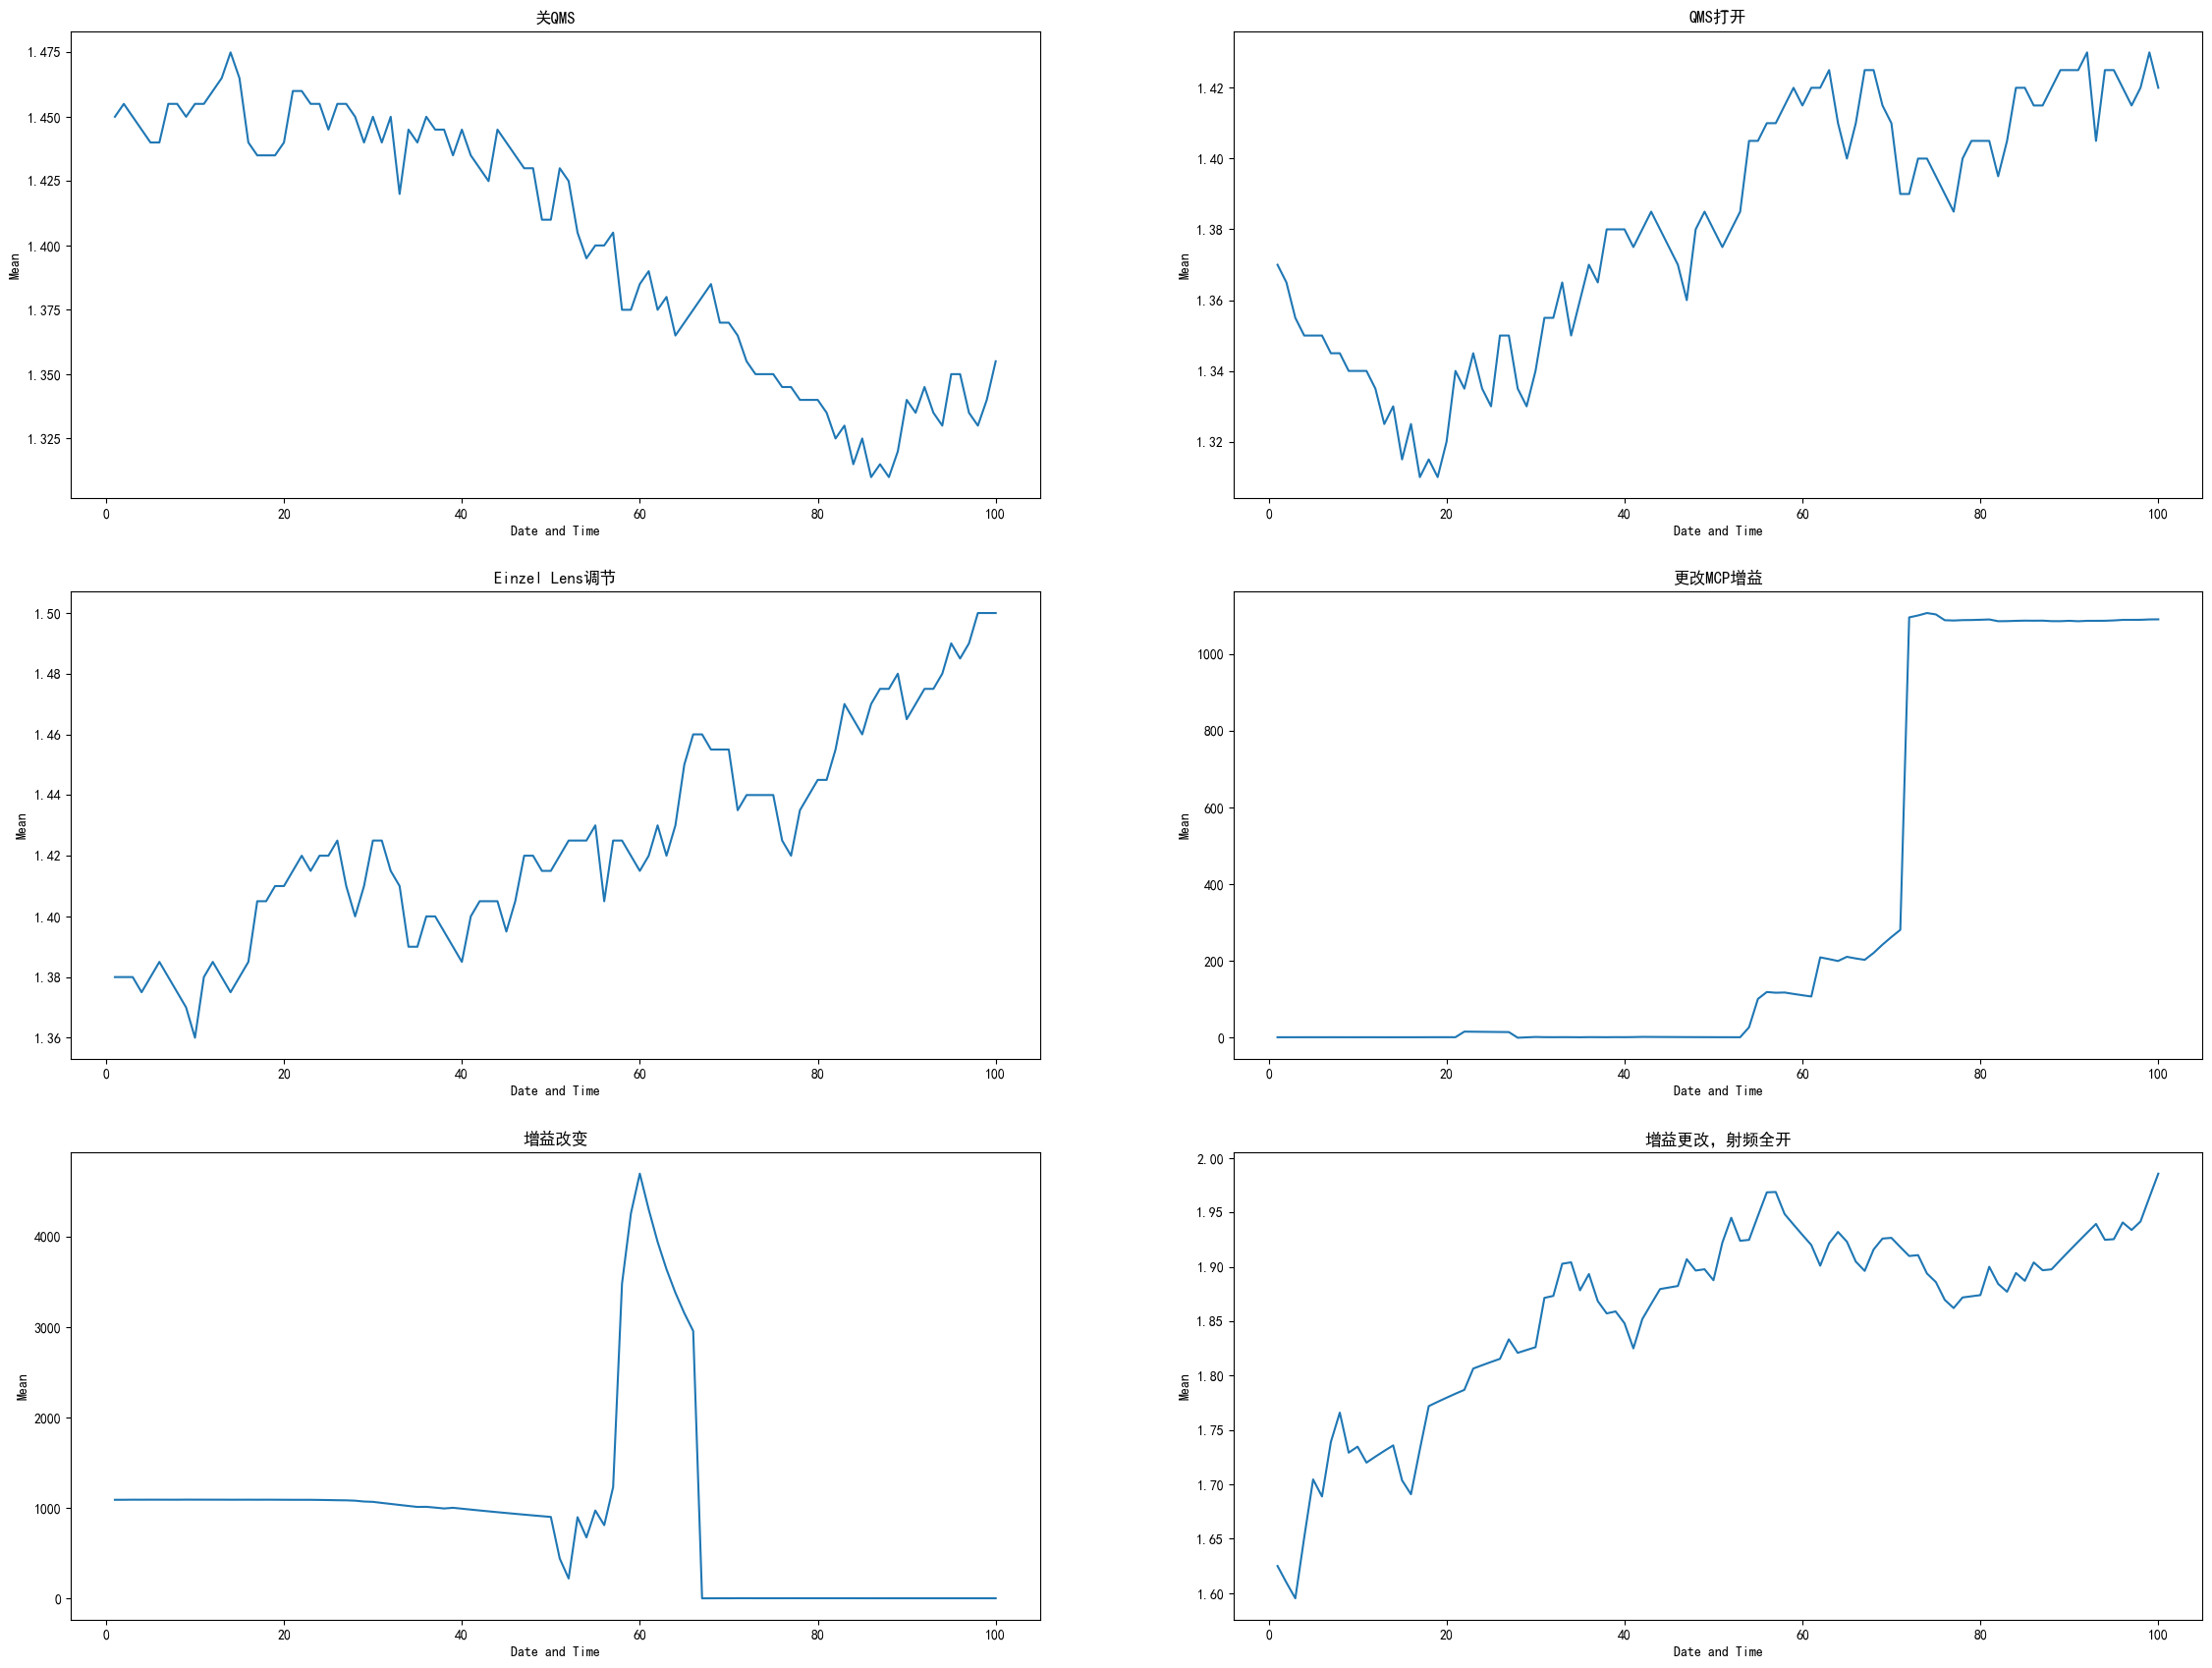

In [38]:
year = '2024'
Month = '04'
day = '02'    
Hour = '16'
datapath = 'D:/Data/'+ year + '/' + year + Month
DA = DataAnalysis(datapath=datapath, Year=year, Month=Month, Day=day, Hour=Hour)
DA.line_check()
DA.line_check_plt()

In [ ]:
#直方图